# CIS IEEE - 3° período

## Análise do dataset (creditcard.csv)

In [1]:
#Vamos começar fazendo uma análise geral do dataset que temos.
#Imports
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
#Lendo o dataframe:
df = pd.read_csv('creditcard.csv', sep = ",")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

A princípio não parece que temos colunas com valorres indesejados no dataset.
Devemos checar agora por valores indesejados nele.

In [4]:
#Checando por valores nulos:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Tudo ok com os valores do dataset. Podemos dar uma olhada na correlação das variáveis presentes nele por meio de um heatmap:

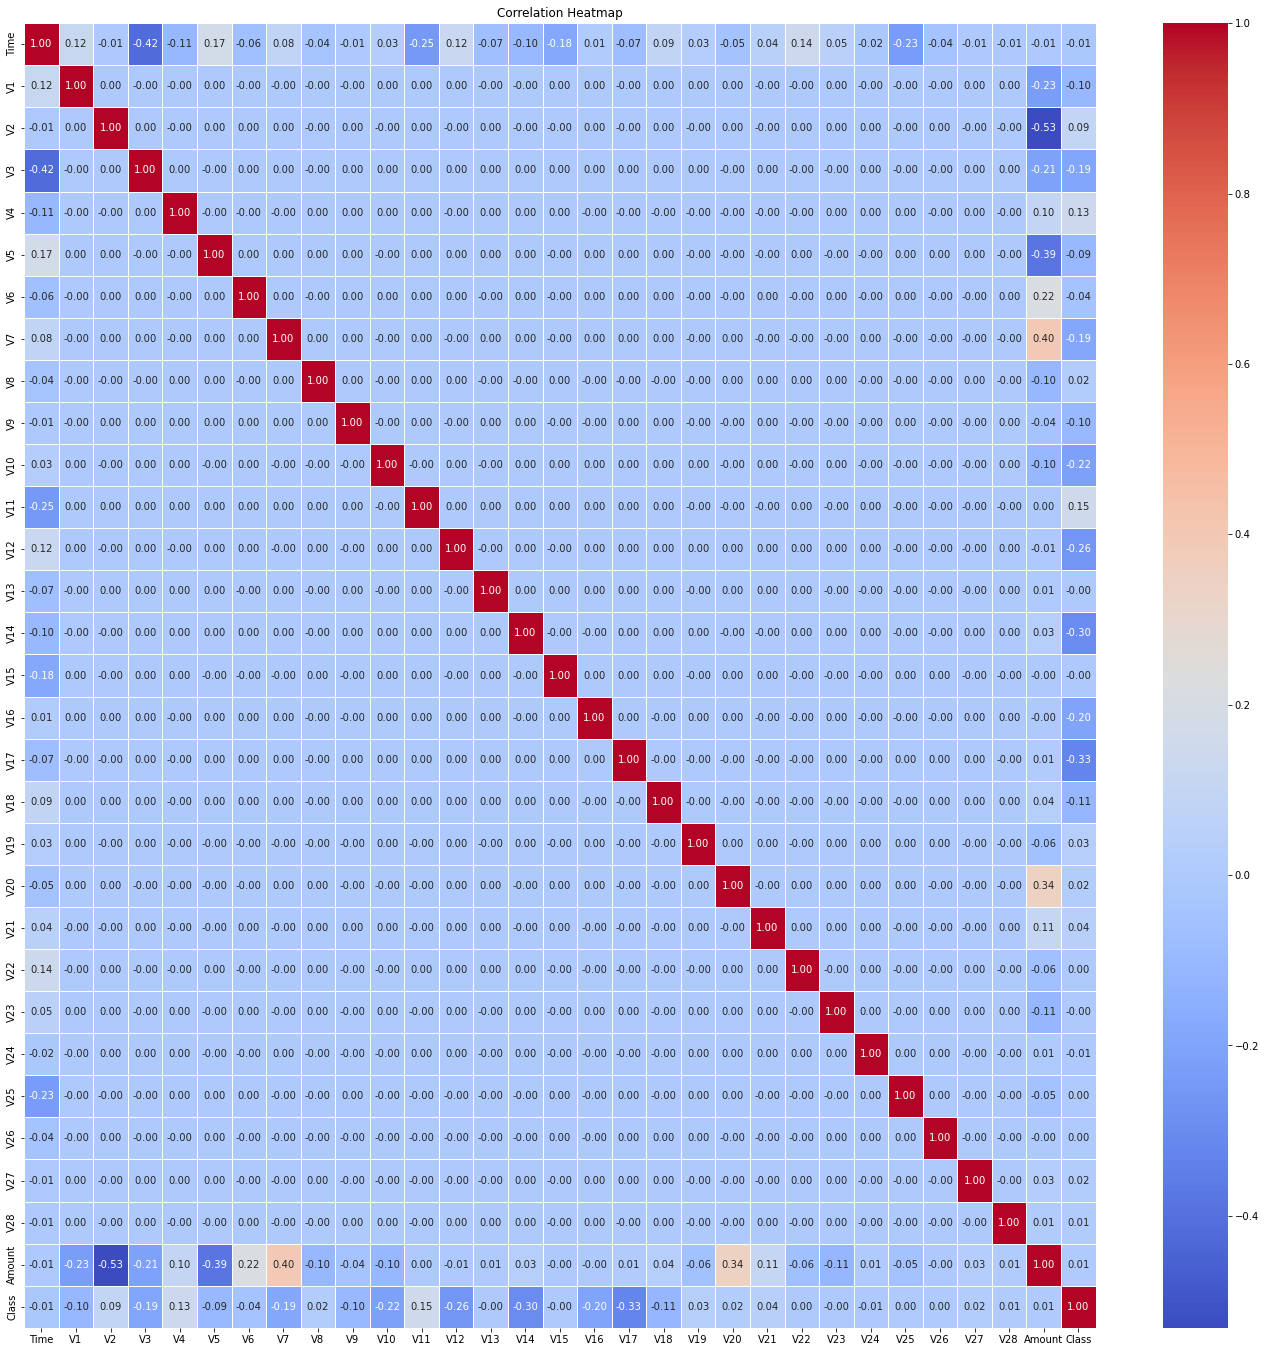

In [5]:
#Checando a correlação de varíaveis:
correlationMatrix = df.corr()
plt.figure(figsize=(24, 24))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

As variáveis "Vnn" têm muita pouca correlação com os dados do dataset, enquanto que "Time", "Amount" e "Class" têm uma maior conexão com o dataset.

Vamos dar uma breve analisada na colunas "Class", a qual provavelmente indica se o cartão foi fraudado ou nao.

In [6]:
def counter(arr):
    return Counter(arr)

valueCounts = counter(df["Class"])
valueCounts

Counter({0: 284315, 1: 492})

Conclusão - estamos trabalhando com classificação binária, em que 0 representa um cartão normal e 1 representa um cartão fraudado.

In [7]:
#Pegando o que queremos:
x = df.iloc[:, 0:-1]#Todas as colunas menos class
y = df.iloc [:, -1] #Pega so class

In [8]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [10]:
#Para realizar as operações com nossas variáveis, precisamos convertê-las para np.arrays:
x = x.to_numpy()
y = y.to_numpy()

In [11]:
x

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [12]:
x.shape

(284807, 30)

In [13]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
y.shape

(284807,)

In [15]:
#Separaçao do training e test set:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [16]:
X_train

array([[ 1.38113000e+05, -3.24116071e-01,  4.73153901e-01, ...,
         9.53768599e-02,  1.52010815e-01,  2.50000000e+00],
       [ 7.86840000e+04,  1.28413402e+00,  1.89097632e-01, ...,
        -1.96570089e-02,  3.06217697e-03,  1.30000000e+00],
       [ 1.41493000e+05,  2.16322987e+00, -9.81365176e-01, ...,
        -1.88755102e-02, -6.16912758e-02,  3.99400000e+01],
       ...,
       [ 5.88710000e+04,  1.24781409e+00, -2.76030030e-02, ...,
        -8.69587849e-02,  1.83691393e-03,  4.99500000e+01],
       [ 7.45580000e+04, -1.76915486e+00, -5.87708872e+00, ...,
        -2.07957903e-01,  2.76839698e-01,  1.55230000e+03],
       [ 1.02908000e+05, -3.30136787e-01,  2.29512092e+00, ...,
         6.98434825e-02,  4.08576530e-02,  7.60000000e-01]])

In [17]:
X_train.shape

(213605, 30)

In [18]:
X_test

array([[ 9.72550000e+04,  6.63948584e-02,  1.29298436e+00, ...,
        -1.24333560e-02,  7.71435314e-03,  1.51300000e+01],
       [ 1.45149000e+05, -2.98397615e-01,  7.30294680e-01, ...,
         4.40718751e-01,  2.73904784e-01,  4.34400000e+01],
       [ 1.25894000e+05, -3.40777722e-01, -1.31811183e+00, ...,
        -1.24300464e-01,  4.07564620e-02,  4.19270000e+02],
       ...,
       [ 1.20864000e+05, -6.73652417e-02, -3.94032278e-01, ...,
         1.72882244e-01,  2.42095179e-01,  1.99500000e+01],
       [ 8.04220000e+04, -1.10997824e-01, -1.67377685e-01, ...,
        -2.13442346e-02,  2.28834988e-01,  7.90000000e+01],
       [ 1.31174000e+05, -4.82661297e+00, -4.57434011e+00, ...,
         2.78217959e-01, -2.05948489e-01,  4.60390000e+02]])

In [19]:
X_test.shape

(71202, 30)

In [20]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
y_train.shape

(213605,)

In [22]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
y_test.shape

(71202,)

In [24]:
X_trainT = X_train.T
X_testT = X_test.T
y_trainT = y_train.reshape(1,-1)
y_testT = y_train.reshape(1,-1)

# Desenvolvimento do Perceptron

In [25]:
#A implementação realizada segue a do Andrew Ng feita em seu curso de deep learning.
#A relu é aplicada para todas as camadas menos a última, em que é aplicada uma sigmoid
#Calcula sigmoid a partir da definição
def sigmoid(Z):
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    #A representa o output da sigmoid, enquanto que o cache é usado no backprop
    return A, cache

#Calcula relu a partir da definição
def relu(Z):
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    
    #A representa o output da relu, enquanto que o cache é usado no backprop
    return A, cache


#Calcula relu implementada na bakprop a partir da definição e sua derivada
def relu_backward(dA, cache):
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

#Calcula sigmoid implementada na bakprop a partir da definição e sua derivada
def sigmoid_backward(dA, cache):
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [26]:
def initialize_parameters(n_x, n_h, n_y):

    #Inicializacao aleatoria dos pesos e zeros dos bias
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    #Salva os parametros
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [27]:
def initialize_parameters_deep(layer_dims):

    parameters = {}
    L = len(layer_dims)            
    
    #Inicializacao aleatoria dos pesos e zeors pro bias para todos os layers
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    return parameters

In [28]:
def linear_forward(A, W, b):

    '''
    A representa as ativações da camada anterior/input. Tem dimensões (tamanho do layer passado, numero de exemplos)
    W representa a matriz de pesos com dimensoes (tamanho da camada atual, tamanho da camada anterior)
    b representa o vetor dos bias, que tem dimensoes (tamanho do layer atual, 1)
    '''
    
    #Representa o input da funcao de ativacao
    Z = np.dot(W,A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    
    #Sera usado no backprop
    cache = (A, W, b)
    
    #Z representa a entrada da funcao de ativacao
    return Z, cache

In [29]:
def linear_activation_forward(A_prev, W, b, activation):
    
    '''
    A_prev representa as ativações do layer passado/inputs tem shape (tamanho do layer passado, numero de exemplos)
    W representa a matriz de pesos de shape (tamanho do layer atual, tamanho do layer anterior)
    b representa o vetor de bias de shape (tamanho do layer atual, 1)
    activation - sigmoid/relu
    '''
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b) #linear_cache "segura" (A_prev, W, b)
        A, activation_cache = sigmoid(Z) #activation_cache "segura" Z
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b) #linear_cache "segura" (A_prev, W, b)
        A, activation_cache = relu(Z) #activation_cache "segura" Z
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [30]:
#Sera usada para replicar linear -> relu L-1 vezes, sendo que L é numero de layers
def L_model_forward(X, parameters):


    caches = []
    A = X
    L = len(parameters) // 2                
    
    #Implemenacao da linear -> relu L-1 vezes, adicionando os valores no cache para o backprop
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], "relu")
        caches.append(cache)
    
    #Implementacao da sigmoid
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [31]:
#Calcula o custo a partir da definicao
def compute_cost(AL, Y):

    m = Y.shape[0]

    cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [32]:
def linear_backward(dZ, cache):

    #dZ é o gradiente do custo em respeito ao output liear da 1a camada
    #O cache acaba como uma tupla que contam (A_prev, W, b) que bem da forward prop do layer atual
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    #dA_prev representa um gradiente do custo em relacao a ativacao do layer anterior. Tem mesma shap de A_prev
    #dW é o gradiente do custo em relacao a W do layer atual. Mesmo shape de W.
    #db representa o gradiente do custo em realacao a b do layer atual. Mesmo shape que b
    
    return dA_prev, dW, db

In [33]:
def linear_activation_backward(dA, cache, activation):
    
    #dA representa o gradiente após a ativação do layer atual
    #O cache é uma tupla de valores (linear_cache, activaion_cache) para o backprop

    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

        
    
    dA_prev, dW, db = linear_backward(dZ, linear_cache)

    #dA_prev representa um gradiente do custo em relacao a ativacao do layer anterior. Tem mesma shap de A_prev
    #dW é o gradiente do custo em relacao a W do layer atual. Mesmo shape de W.
    #db representa o gradiente do custo em realacao a b do layer atual. Mesmo shape que b
    
    return dA_prev, dW, db

In [34]:
def L_model_backward(AL, Y, caches):
 
    '''
    AL representa o vetor de probabilidade que é output da forward prop
    Y representa nossas classificacções de fraude e normal
    caches é uma lista de caches que contém:
    -os caches de linear_activation_forward() com relu de 0 até l-1
    -os chaces de linear_activation_forward() com sigmoid em l
    '''
    
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1] # Last Layer
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")

    for l in reversed(range(L-1)):
 
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    #O grads retornado é um dicionario com gradientes:
    #grads["dA" + str(l)] = ... 
    #grads["dW" + str(l)] = ...
    #grads["db" + str(l)] = ... 
    
    return grads

In [35]:
#Atualizacao dos parametros
def update_parameters(parameters, grads, learning_rate):

    
    L = len(parameters) // 2 

    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    
    #Esses parametros retornados sao um dicionario da forma:
    #parameters["W" + strl(l)] = ...
    #parameters["b" + str(l)] = ...
    return parameters

In [36]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    
    grads = {}
    costs = []                              
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    
    #Inicializacao
    parameters = initialize_parameters(n_x, n_h, n_y)

    #Pegando os parametros
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    
    #Loop das iteracoes
    for i in range(0, num_iterations):
    
        #Linear -> relu ->sigmoid 
        A1, cache1 = linear_activation_forward(X, W1, b1, activation="relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation="sigmoid")
        
        #Computar cost
        cost = compute_cost(A2, Y)
         
        #Inicializacao do backrop
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        #Calculo do backprop
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation="sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation="relu")
        
        #Colocar os gradientes no dicionario
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        #Atualizacao de parametros a partir dos gradientes
        parameters = update_parameters(parameters, grads, learning_rate)
        
        #Pegar os novos valores dos parametros
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        #Printar o custo a cada 100 iteracoes
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [37]:
parameters = two_layer_model(X_train, y_train, layers_dims = (X_train.shape[0], 30, y_train.shape[0]), num_iterations = 300, print_cost=True)

C:\Users\breno\AppData\Local\Temp\ipykernel_20532\1746103034.py:6: RuntimeWarning: overflow encountered in exp
  A = 1/(1+np.exp(-Z))
C:\Users\breno\AppData\Local\Temp\ipykernel_20532\2323191926.py:6: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (np.dot(Y, np.log(AL).T) + np.dot((1-Y), np.log(1-AL).T))


ValueError: shapes (213605,) and (30,213605) not aligned: 213605 (dim 0) != 30 (dim 0)